In [53]:
import cv2

In [54]:
import matplotlib.pyplot as plt

In [55]:
config_file="ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model="frozen_inference_graph.pb"

In [56]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [57]:
classlabels = []
filename = "New Text Document.txt"
with open(filename,"rt") as fpt:
    classlabels = fpt.read().rstrip("\n").split("\n")

In [58]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 000001FE8EC46530>

In [59]:
print(classlabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [60]:
img = cv2.imread("IMG_20200218_174626.jpg")

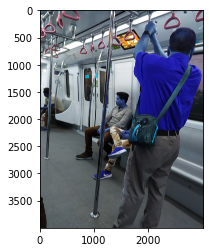

In [61]:
plt.imshow(img)

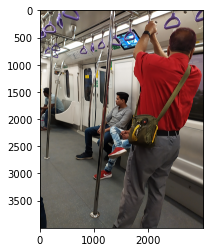

In [62]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [63]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)

In [64]:
print(ClassIndex)

[ 1  1  7 31  1]


In [65]:
font_scale = 15
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0), 2)
    cv2.putText(img,classlabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 0, 255), thickness=3)

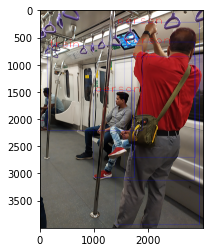

In [66]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))